# 1 - Introdução ao problema e força bruta

## 1.1 - O Problema das Entregas: Origem, Endereços e Destino

Imagine uma empresa inovadora, enfrentando o desafio cotidiano de realizar entregas eficientes em uma cidade cheia de dinamismo. A companhia busca incessantemente formas de otimizar suas rotas de entrega para oferecer um serviço rápido e de qualidade, enquanto mantém os custos operacionais sob controle.

**Definindo a Origem: O Ponto de Partida**

Tudo começa na **origem**, o centro de distribuição. É deste ponto que os veículos de entrega saem carregados, prontos para distribuir os produtos aos clientes. A origem é representada de maneira simples e objetiva: uma tupla contendo dois elementos, a latitude e a longitude:

```python
origem = (x_origem, y_origem)
```

Esta coordenada geográfica funciona como o ponto inicial de todas as rotas de entrega planejadas para o dia.

**Estabelecendo o Destino: O Ponto de Chegada**

Cada rota precisa ter um ponto final, o **destino**. Este pode ser o próprio centro de distribuição, marcando o retorno dos veículos, ou pode ser um outro local estratégico, como um segundo centro de distribuição ou uma oficina para manutenção dos veículos. Da mesma forma que a origem, o destino é definido por uma tupla de latitude e longitude:

```python
destino = (x_destino, y_destino)
```

**Listando os Endereços: Os Pontos Intermediários**

Entre a origem e o destino, temos os **endereços de entrega**, os pontos que os veículos devem visitar para realizar as entregas. Cada endereço é um ponto no espaço, representado igualmente por uma tupla de coordenadas geográficas, formando uma lista:

```python
enderecos = [(x1, y1), (x2, y2), ..., (xn, yn)]
```

Estes são os pontos de parada obrigatória na rota, e o desafio é conectá-los da maneira mais eficiente possível.

In [1]:
origem = (0,0)
destino = (4,4)

enderecos = [(2, 1), (2,2), (8, 3), (5, 3)]

**Definindo uma Rota Básica: Conexão Direta entre Pontos**

Antes de embarcarmos na otimização das rotas, é essencial entender como uma rota básica pode ser representada e estruturada. Uma maneira simples e intuitiva de iniciar é conectando diretamente a **origem** aos **endereços de entrega** e, finalmente, ao **destino**. Este processo gerará uma lista ordenada de pontos que delineiam um caminho a ser seguido.

**Estrutura de uma Rota**

Uma rota, neste contexto, é uma lista de tuplas, onde cada tupla representa as coordenadas cartesianas \( (x, y) \) de um ponto específico na rota. Esta lista é ordenada: começa com a origem, passa por todos os endereços de entrega, e culmina no destino. Uma representação simplificada da rota seria:

```python
rota = [origem, (x1, y1), (x2, y2), ..., (xn, yn), destino]
```

**Construindo Uma Rota Inicial**

Agora que compreendemos a estrutura básica de uma rota, podemos começar a construir a nossa rota inicial. Este processo é bastante direto, principalmente porque Python facilita a concatenação de listas.

**Criação Simplificada de uma Rota**

A rota inicial pode ser criada através da concatenação de três listas:

1. Uma lista contendo apenas a origem.
2. A lista de endereços de entrega.
3. Uma lista contendo apenas o destino.

Com este método, podemos facilmente construir a rota completa, do ponto de origem até o ponto de destino, passando por todos os endereços onde as entregas devem ser realizadas.

O código abaixo ilustra este processo de forma simplificada:

```python
rota = [origem] + enderecos + [destino]
```

In [2]:
rota = [origem] + enderecos + [destino]

In [3]:
rota

[(0, 0), (2, 1), (2, 2), (8, 3), (5, 3), (4, 4)]

Para visualizar efetivamente as rotas geradas e facilitar o processo de análise e otimização, utilizaremos a biblioteca `matplotlib.pyplot`. Este pacote gráfico em Python é extremamente eficaz para produzir gráficos estáticos, interativos e animados de alta qualidade em uma sintaxe simples e fácil de entender.


Agora, considerando que você já temos uma `rota` definida (uma lista de tuplas, onde cada tupla representa as coordenadas cartesianas de um ponto na rota), o plot da rota pode ser feito da seguinte forma:

In [4]:
import matplotlib.pyplot as plt

In [5]:
from scipy.spatial.distance import euclidean as distancia_euclidiana

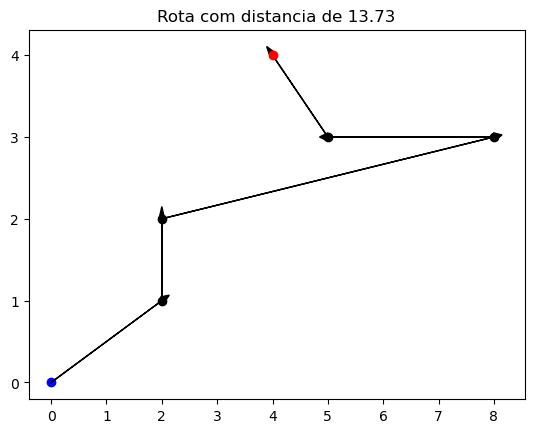

In [6]:
# Definindo o tamanho da rota para facilitar a iteração posterior
tamanho_rota = len(rota)
# Inicializando a variável que armazenará a distância total percorrida na rota
distancia_percorrida = 0

# Iterando sobre cada ponto na rota
for i in range(tamanho_rota):
    # Coordenadas do ponto atual na iteração
    x, y = rota[i]
    # Definindo a cor padrão dos pontos como preta
    cor = "black"
    # Se o ponto atual é o ponto de origem, sua cor será azul
    if i == 0:
        cor = "blue"
    # Se o ponto atual é o ponto de destino, sua cor será vermelha
    elif i == tamanho_rota - 1:
        cor = "red"

    # Plotando o ponto atual com a cor definida
    plt.scatter(x, y, color=cor)

    # Se o ponto atual não é o último, desenhamos uma seta até o próximo ponto
    if i < tamanho_rota - 1:
        # Coordenadas do próximo ponto na rota
        x1, y1 = rota[i+1]
        # Calculando a diferença nas coordenadas para determinar o tamanho e direção da seta
        dx = x1 - x
        dy = y1 - y
        # Desenhando uma seta do ponto atual para o próximo ponto
        plt.arrow(x, y, dx, dy, color="black", head_width=0.1)
        # Atualizando a distância total percorrida com a distância até o próximo ponto
        distancia_percorrida = distancia_percorrida + distancia_euclidiana(rota[i], rota[i+1])

# Adicionando um título ao gráfico, incluindo a distância total percorrida na rota
plt.title(f"Rota com distancia de {round(distancia_percorrida, 2)}")
# Mostrando o gráfico
plt.show()


**Interpretação do Gráfico:**

1. **Pontos no Gráfico:**
   - Cada ponto (ou nó) no gráfico representa uma localização no espaço 2D, que pode ser um endereço de entrega, a origem (depósito inicial), ou o destino final (outro centro de distribuição ou oficina, por exemplo).
   - A origem é representada pelo ponto azul, e o destino pelo ponto vermelho. Os endereços de entrega intermediários são representados por pontos pretos.

2. **Setas Entre os Pontos:**
   - As setas conectam os pontos consecutivamente, indicando a sequência de entregas.
   - A direção das setas mostra o caminho que o veículo de entrega deve seguir, partindo da origem, passando pelos pontos de entrega, e finalmente chegando ao destino.

3. **Distância Percorrida:**
   - O título do gráfico apresenta a distância total percorrida nesta rota específica.
   - A distância entre cada par de pontos consecutivos é calculada usando a função `distancia_euclidiana`. Essa função calcula a distância euclidiana padrão entre dois pontos no plano cartesiano.
   - A `distancia_percorrida` é acumulada durante o loop, somando a distância entre cada par de pontos consecutivos na rota.

**Como Ler o Gráfico:**

- **Início e Fim da Rota:**
  - Olhe para os pontos azul e vermelho para identificar onde a rota começa e termina, respectivamente.

- **Sequência de Entregas:**
  - Siga as setas a partir do ponto azul para visualizar a ordem e o caminho das entregas até chegar ao ponto vermelho.

- **Distância Total:**
  - Verifique o título do gráfico para saber a distância total percorrida nessa rota.

 **Análise Adicional:**
- Este gráfico é especialmente útil para visualizar e comparar diferentes rotas propostas pelo seu algoritmo de otimização.
- A análise visual pode nos ajudar a identificar rapidamente rotas ineficientes ou pontos de entrega que estão significativamente fora do caminho ideal.

Por fim, podemos transformar esse código em uma função para reutilizarmos posteriormente.

In [7]:
def desenhar_rota(rota):
    tamanho_rota = len(rota)
    distancia_percorrida = 0

    for i in range(tamanho_rota):
        x,y = rota[i]

        cor = "black"
        if i == 0:
            cor = "blue"
        elif i == tamanho_rota - 1:
            cor = "red"

        plt.scatter(x, y, color=cor)

        if i < tamanho_rota - 1:
            x1, y1 = rota[i+1]
            dx = x1 - x
            dy = y1 - y
            plt.arrow(x, y, dx, dy, color="black", head_width = 0.1)
            distancia_percorrida = distancia_percorrida + distancia_euclidiana(rota[i], rota[i+1])

    plt.title(f'Rota com distancia de {round(distancia_percorrida, 2)}')
    plt.show()

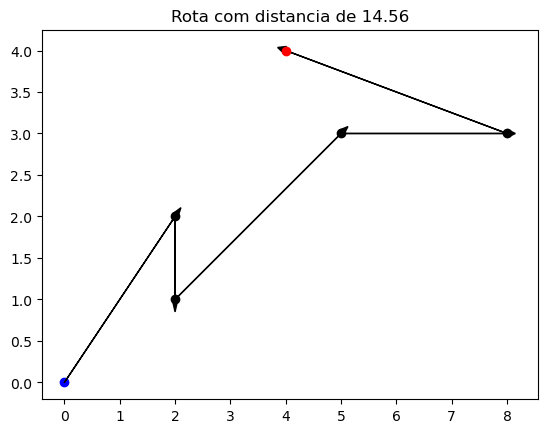

In [8]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2, 1), (5, 3), (8, 3)]

rota = [origem] + enderecos + [destino]
desenhar_rota(rota)

## 1.2 - Resolução via Força Bruta


O método de **Força Bruta** é uma abordagem direta e exaustiva para resolver o problema de otimização da rota de entrega. Este método não faz suposições, não elimina alternativas e, de fato, examina todas as possíveis combinações de rotas para encontrar a mais eficiente.


In [9]:
from itertools import permutations

In [10]:
def calcular_distancia_rota(rota):
    """
    Esta função calcula a distância total de uma rota, somando as distâncias
    euclidianas entre pontos consecutivos da rota fornecida.

    Parameters:
    rota (list): Uma lista de pontos (tuplas) onde cada ponto representa uma posição no espaço.

    Returns:
    float: A distância total percorrida na rota.
    """

    distancia = 0  # Inicializa a variável que armazenará a distância total.
    tamanho_rota = len(rota)  # Armazena o número total de pontos na rota.

    # Itera sobre cada ponto na rota.
    for i in range(tamanho_rota):
        # Verifica se o ponto atual não é o último na rota.
        if i < tamanho_rota - 1:
            # Calcula e acumula a distância euclidiana entre o ponto atual e o próximo.
            distancia = distancia + distancia_euclidiana(rota[i], rota[i+1])

    return distancia  # Retorna a distância total calculada.



**Funcionamento do Método:**
O método de Força Bruta cria todas as permutações possíveis dos endereços de entrega (excluindo origem e destino), criando assim todas as rotas possíveis. Para cada rota gerada, podemos calcular a distância total usando uma função `calcular_distancia_rota` e mantém um registro da rota que tem a menor distância total. A função `calcular_distancia_rota` é uma função que retorna a soma das distâncias entre todos os pontos consecutivos na rota.

**Implementação com Permutations:**
Na implementação usando o `permutations` do módulo `itertools`, cada permutação dos endereços é considerada uma rota possível. Para cada permutação, a origem é adicionada no início, e o destino é adicionado no final da lista de endereços permutados. Então, a distância total da rota é calculada, e a rota é comparada com a rota conhecida de menor distância. Se a rota recém-calculada tem uma distância menor, ela se torna a nova rota de menor distância.

[(0, 0), (2, 1), (2, 2), (5, 3), (8, 3), (4, 4)] 13.52145126328583


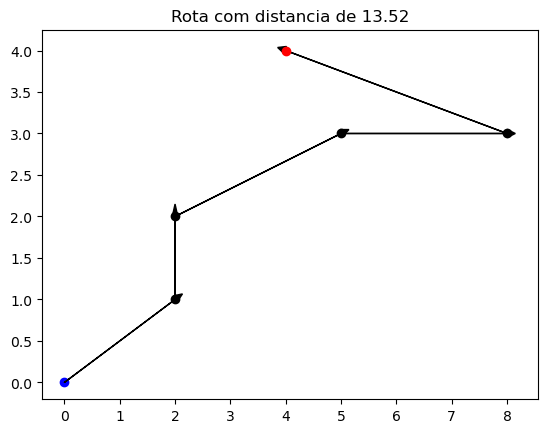

In [11]:
# Definindo as variáveis para armazenar a menor distância e a rota correspondente
menor_distancia = float('inf')  # Inicializando a menor distância com infinito
menor_rota = None  # Inicializando a variável que armazenará a rota correspondente à menor distância

# Iterando sobre todas as permutações possíveis dos endereços
for permutacao in permutations(enderecos):
    # Construindo a rota atual adicionando o ponto de origem no início,
    # o ponto de destino no final, e a permutação atual dos endereços no meio
    rota = [origem] + list(permutacao) + [destino]

    # Calculando a distância total da rota atual usando a função definida anteriormente
    distancia_rota = calcular_distancia_rota(rota)

    # Verificando se a distância total da rota atual é menor que a menor distância registrada até agora
    if distancia_rota < menor_distancia:
        # Atualizando a menor distância e a rota correspondente
        menor_distancia = distancia_rota
        menor_rota = rota

# Imprimindo a menor rota e sua distância correspondente
print(menor_rota, menor_distancia)

# Desenhando a rota no espaço, usando uma função 'desenhar_rota()' que deve estar definida em algum lugar no seu código
desenhar_rota(menor_rota)


##  1.3 - Análise de Eficiência da Força Bruta


Podemos definir uma função para reutilizar posteriormente caso necessário.

In [12]:
def forca_bruta(origem, destino, enderecos):
    # Inicializa a variável que vai armazenar a menor distância encontrada
    # com infinito, pois qualquer distância calculada será menor que infinito.
    menor_distancia = float('inf')

    # Inicializa a variável que vai armazenar a rota correspondente à menor distância
    # com None, pois ainda não encontramos nenhuma rota.
    menor_rota = None

    # Itera sobre todas as permutações possíveis dos endereços.
    # permutations(enderecos) retorna todas as possíveis ordenações dos endereços,
    # ou seja, todas as rotas possíveis (sem considerar origem e destino).
    for permutacao in permutations(enderecos):
        # Cria uma rota completa adicionando a origem no início da permutação
        # dos endereços e o destino no final.
        rota = [origem] + list(permutacao) + [destino]

        # Calcula a distância total da rota usando a função calcular_distancia_rota
        distancia_rota = calcular_distancia_rota(rota)

        # Verifica se a distância da rota calculada é menor que a menor distância encontrada até agora.
        # Se for, atualiza as variáveis menor_distancia e menor_rota.
        if distancia_rota < menor_distancia:
            menor_distancia = distancia_rota
            menor_rota = rota

    # Retorna a menor rota encontrada e sua respectiva distância.
    return menor_rota, menor_distancia


In [13]:
import time

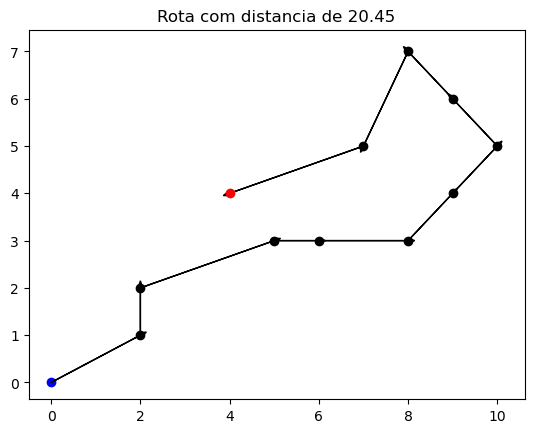

Tempo de execução: 193.0 segundos


In [14]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2, 1), (5, 3), (8, 3), (10, 5), (9, 4), (8, 7), (6, 3), (9, 6), (7, 5)]

tempo_inicial = time.time()

menor_rota, menor_distancia = forca_bruta(origem, destino, enderecos)
desenhar_rota(menor_rota)

tempo_final = time.time()

tempo_execucao = tempo_final - tempo_inicial

print(f"Tempo de execução: {round(tempo_execucao, 0)} segundos")

A força bruta é intuitivamente simples e é frequentemente a primeira estratégia que vem à mente ao nos depararmos com problemas de tomada de decisão. Afinal, se pudermos verificar todas as possíveis soluções, certamente encontraremos a melhor. Entretanto, o aspecto computacional dessa abordagem frequentemente não é viável.

No problema das entregas, o número de soluções possíveis aumenta fatorialmente com o número de endereços. Isso é denotado matematicamente como n! (no qual "!" indica o fatorial e "n" o número de endereços).

Por exemplo:

Com 2 endereços, temos: 2! = 2 * 1 = 2 possíveis rotas. Com 3 endereços: 3! = 3 * 2 * 1 = 6 possíveis rotas. Com 4 endereços: 4 = 4 * 3 * 2 * 1 = 24 possíveis rotas. À medida que o número de endereços cresce, o número de rotas possíveis explode exponencialmente, tornando a força bruta computacionalmente proibitiva para um número maior de endereços. Note que para 10! temos cerca de 3,6 milhões e para modestos 20 endereços o número de soluções possíveis é 2,43 X 10^18

Em resumo, enquanto a força bruta é uma abordagem fácil de entender e intuitiva, é importante considerar as implicações computacionais e a viabilidade prática antes de se comprometer com essa estratégia em problemas mais complexos.

**Vantagens da força bruta**

- Implementação simplificada: em cenários nos quais a prioridade é ter uma solução rápida e o tamanho do problema é restrito, a força bruta é uma opção atrativa devido à sua simplicidade.

- Garantia de precisão: quando se deseja uma solução exata para uma instância de teste ou para validar modelos em desenvolvimento, ela pode fornecer a solução ótima.

- Problemas de pequeno porte: em situações que envolvem um conjunto limitado de opções ou variáveis, a força bruta pode ser a escolha ideal devido à sua capacidade de explorar todas as possibilidades.

**Limitações da força bruta**

- Ineficiência em escalas maiores: a abordagem rapidamente torna-se inviável à medida que o tamanho do problema aumenta.

- Demanda de recursos: a necessidade crescente de poder computacional pode ser uma restrição em problemas de maior magnitude.

- Dificuldade de adaptação: em cenários dinâmicos, nos quais os parâmetros do problema podem mudar com frequência, a força bruta pode não ser a opção mais ágil.

**Considerações práticas**

- Prototipagem rápida: a força bruta pode ser útil em fases iniciais de projetos, quando a prioridade é prototipar uma solução funcional rapidamente.

- Verificação de modelos: ao desenvolver modelos mais sofisticados, pode ser útil usar a força bruta para obter soluções ótimas em instâncias menores e verificar a eficácia de novas abordagens.

# 2 - Métodos heurísticos e meta-heurísticos

## 2.1 - Implementação da heurística do vizinho mais próximo


In [15]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2, 1), (5, 3), (8, 3)]

A estratégia de visitar sempre o 'Vizinho Mais Próximo' oferece uma abordagem intuitiva e direta para lidar com desafios de roteirização, como a determinação eficiente de rotas de entrega entre uma origem, vários endereços de entrega e um destino final.

**Funcionamento da Heurística do Vizinho Mais Próximo:**

1. **Início na Origem:** O algoritmo inicia na origem e considera esse ponto como o ponto atual de referência.

2. **Seleção do Próximo Ponto:** De todos os endereços ainda não visitados, o algoritmo seleciona aquele que está mais próximo do ponto atual, usando uma métrica de distância predefinida.

3. **Transição:** O endereço selecionado é então considerado o novo ponto atual, e o algoritmo prossegue, repetindo o processo de seleção até que todos os endereços sejam visitados.

4. **Conclusão no Destino:** Após a visita a todos os endereços, a rota se encerra no destino final, podendo ser um centro de distribuição, uma oficina ou qualquer outro local predefinido.

**Processo em Resumo:**

Assim, o algoritmo navega sucessivamente para o endereço mais próximo disponível, criando uma rota que, embora não seja a mais curta possível, é construída de maneira rápida e intuitiva. Este método é útil quando necessitamos de soluções ágeis e eficazes para problemas como o nosso das entregas, proporcionando rotas que podem ser otimizadas posteriormente, se necessário.

In [16]:
# Definindo o ponto de partida como a origem inicialmente
ponto_atual = origem
# Criando uma cópia dos endereços a serem visitados
enderecos_restantes = enderecos.copy()

# Inicializando a variável que irá armazenar a distância total percorrida
distancia_percorrida = 0
# Inicializando a lista da rota com o ponto de origem
menor_rota = [ponto_atual]

# Loop que continua enquanto houver endereços a serem visitados
while enderecos_restantes:
    # Inicializando variáveis para encontrar o ponto mais próximo
    menor_distancia = float('inf')
    ponto_mais_proximo = None

    # Iterando sobre os endereços restantes
    for endereco in enderecos_restantes:
        # Calculando a distância entre o ponto atual e o endereço iterado
        distancia = distancia_euclidiana(ponto_atual, endereco)
        # Verificando se a distância calculada é menor que a menor distância registrada até então
        if distancia < menor_distancia:
            # Atualizando a menor distância e o ponto mais próximo
            menor_distancia = distancia
            ponto_mais_proximo = endereco

    # Removendo o ponto mais próximo da lista de endereços restantes, já que ele será visitado
    enderecos_restantes.remove(ponto_mais_proximo)
    # Adicionando o ponto mais próximo à rota
    menor_rota.append(ponto_mais_proximo)
    # Atualizando a distância total percorrida com a distância até o ponto mais próximo
    distancia_percorrida = distancia_percorrida + menor_distancia
    # Atualizando o ponto atual para o ponto mais próximo para a próxima iteração
    ponto_atual = ponto_mais_proximo

# Ao fim do loop, adicionando o destino final à rota
menor_rota.append(destino)
# Adicionando a distância do último ponto visitado até o destino final à distância total percorrida
distancia_percorrida = distancia_percorrida + distancia_euclidiana(ponto_atual, destino)


In [17]:
menor_rota, distancia_percorrida

([(0, 0), (2, 1), (2, 2), (5, 3), (8, 3), (4, 4)], 13.52145126328583)

Assim, podemos definir uma função para aplicar essa estratégia.

In [18]:
def vizinho_mais_proximo(origem, destino, enderecos):
    # Definindo o ponto de partida como a origem inicialmente
    ponto_atual = origem
    # Criando uma cópia dos endereços a serem visitados
    enderecos_restantes = enderecos.copy()

    # Inicializando a variável que irá armazenar a distância total percorrida
    distancia_percorrida = 0
    # Inicializando a lista da rota com o ponto de origem
    menor_rota = [ponto_atual]

    # Loop que continua enquanto houver endereços a serem visitados
    while enderecos_restantes:
        # Inicializando variáveis para encontrar o ponto mais próximo
        menor_distancia = float('inf')
        ponto_mais_proximo = None

        # Iterando sobre os endereços restantes
        for endereco in enderecos_restantes:
            # Calculando a distância entre o ponto atual e o endereço iterado
            distancia = distancia_euclidiana(ponto_atual, endereco)
            # Verificando se a distância calculada é menor que a menor distância registrada até então
            if distancia < menor_distancia:
                # Atualizando a menor distância e o ponto mais próximo
                menor_distancia = distancia
                ponto_mais_proximo = endereco

        # Removendo o ponto mais próximo da lista de endereços restantes, já que ele será visitado
        enderecos_restantes.remove(ponto_mais_proximo)
        # Adicionando o ponto mais próximo à rota
        menor_rota.append(ponto_mais_proximo)
        # Atualizando a distância total percorrida com a distância até o ponto mais próximo
        distancia_percorrida = distancia_percorrida + menor_distancia
        # Atualizando o ponto atual para o ponto mais próximo para a próxima iteração
        ponto_atual = ponto_mais_proximo

    # Ao fim do loop, adicionando o destino final à rota
    menor_rota.append(destino)
    # Adicionando a distância do último ponto visitado até o destino final à distância total percorrida
    distancia_percorrida = distancia_percorrida + distancia_euclidiana(ponto_atual, destino)

    return menor_rota, distancia_percorrida

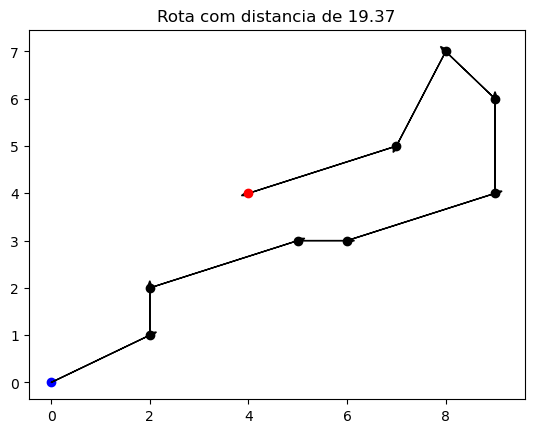

Força Bruta - Tempo de execução: 2.0 segundos


In [19]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2, 1), (5, 3), (9, 4), (8, 7), (6, 3), (9, 6), (7, 5)]

tempo_inicial = time.time()

menor_rota, menor_distancia = forca_bruta(origem, destino, enderecos)
desenhar_rota(menor_rota)

tempo_final = time.time()

tempo_execucao = tempo_final - tempo_inicial

print(f"Força Bruta - Tempo de execução: {round(tempo_execucao, 0)} segundos")

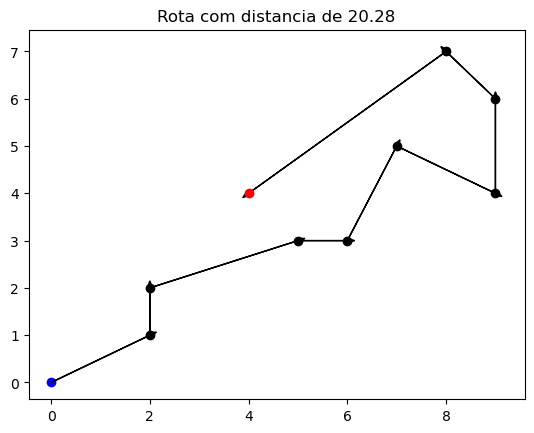

Heurística 'Gulosa' do Vizinho Mais Próximo - Tempo de execução: 0.0 segundos


In [20]:
tempo_inicial = time.time()

menor_rota, menor_distancia = vizinho_mais_proximo(origem, destino, enderecos)
desenhar_rota(menor_rota)

tempo_final = time.time()

tempo_execucao = tempo_final - tempo_inicial

print(f"Heurística 'Gulosa' do Vizinho Mais Próximo - Tempo de execução: {round(tempo_execucao, 0)} segundos")

Enquanto a heurística do vizinho mais próximo pode rapidamente fornecer uma solução eficaz, ela pode não ser a solução ótima.

Isso nos leva à distinção entre otimização local e global. Um ótimo local é a melhor solução dentro de um contexto específico, enquanto o ótimo global é a melhor solução dentre todas as possibilidades. As heurísticas são fantásticas para identificar ótimos locais rapidamente, mas raramente garantem o ótimo global.

Por que, então, as heurísticas são tão úteis? Em ambientes dinâmicos, decisões rápidas frequentemente fazem a diferença. Uma solução boa o suficiente em pouco tempo pode ser mais valiosa do que a solução perfeita que leva muito mais tempo.

##  2.2 - Implementação de algoritmos genéticos


In [21]:
origem = (0,0)
destino = (4,4)

enderecos = [(2, 1), (2,2), (8, 3), (5, 3)]

Os algoritmos genéticos (AGs) são métodos de otimização inspirados nos processos de seleção natural e genética. Eles são frequentemente utilizados para encontrar soluções aproximadas em problemas de otimização e busca complexos e variados, como o desafio de otimizar rotas de entregas que as empresas enfrentam diariamente.

No contexto da otimização de rotas de entregas, o AG funciona da seguinte maneira:

- **Início**: Uma população inicial de rotas possíveis (ou "indivíduos") é gerada aleatoriamente. Cada rota representa uma solução potencial para o problema, indicando a ordem na qual os endereços devem ser visitados partindo de uma origem até um destino.

- **Avaliação**: Cada indivíduo na população é avaliado usando uma função de aptidão. No nosso caso, essa função calcula a distância total que seria percorrida ao seguir a rota proposta pelo indivíduo. O objetivo é minimizar essa distância.

- **Seleção**: Indivíduos são selecionados para serem pais baseados em sua aptidão. Aqueles que performam melhor têm uma chance maior de serem selecionados.

- **Cruzamento (Crossover)**: Os indivíduos pais são combinados entre si de maneira controlada para criar descendentes. O processo de cruzamento gera novos indivíduos que possuem características combinadas dos pais.

- **Mutação**: Pequenas alterações aleatórias são aplicadas aos descendentes para introduzir variação na população.

- **Nova Geração**: Os indivíduos criados através de cruzamento e mutação formam uma nova população, e o processo é repetido por um número determinado de gerações ou até que uma condição de parada seja atingida.

Ao longo das gerações, espera-se que a população evolua em direção a soluções que minimizam a distância total de percurso, ajudando as empresas a realizarem suas entregas de maneira mais eficiente e econômica.

Pensando em um conjunto inicial de rotas possíveis, representando a primeira "geração" ou "população". Tal qual no reino natural, cada rota, simbolizada como "indivíduo", possui características distintas, seus "genes". No entanto, em vez de características físicas, como a cor de um pelo ou o formato de um bico, aqui, os "genes" delineiam a sequência de endereços. Por exemplo, o endereço Origem → A → B → C → D → Destino é uma rota potencial.

A essência do processo é similar à seleção natural. Em um ambiente de entregas, avaliamos a "aptidão" de cada rota pela sua eficiência. Por exemplo, a rota Origem → A → C → B → D → Destino pode ser mais curta e, portanto, mais "apta" do que Origem → C → B → A → D → Destino. Aquelas rotas que se provarem mais eficientes são escolhidas para "reproduzir".

Agora, considerando o processo de cruzamento ou recombinação, vamos supor que duas rotas sejam selecionadas: Origem → A → C → B → D → Destino e Origem → B → A → C → D → Destino. Um cruzamento possível entre elas poderia resultar na nova rota: Origem → A → C → B → D → Destino ou Origem → B → A → C → D → Destino, mesclando partes de ambas.

E para assegurar a diversidade e evitar estagnação, introduzem-se "mutações", como a troca aleatória de dois endereços. Pegue a rota Origem → A → C → B → D → Destino. Uma mutação poderia trocar os endereços B e C, resultando em Origem → A → B → C → D → Destino.

Através de repetidas iterações de seleção, cruzamento e mutação, a população evolui. As rotas se tornam cada vez mais otimizadas.

In [22]:
# Definindo a função 'avaliar' que irá avaliar um indivíduo (uma possível rota)
def avaliar(individuo, origem, enderecos, destino):
    # Inicializando a rota com o ponto de origem
    rota = [origem]

    # Iterando sobre os índices armazenados no indivíduo
    # Os índices representam posições na lista de endereços
    for i in individuo:
        # Adicionando cada endereço correspondente ao índice na rota
        rota.append(enderecos[i])

    # Após iterar por todos os endereços, adicionando o destino final à rota
    rota.append(destino)

    # Calculando a distância total percorrida na rota gerada
    distancia_percorrida = calcular_distancia_rota(rota)

    # Retornando a distância total percorrida
    # Este valor será usado como medida de avaliação do indivíduo
    return distancia_percorrida,

In [23]:
individuo = [1, 0, 3, 2]
avaliar(individuo, origem, enderecos, destino)

(14.557084025827841,)

Antes de mergulharmos no código, é essencial que nós compreendamos a biblioteca DEAP (Distributed Evolutionary Algorithms in Python), uma ferramenta poderosa para algoritmos evolutivos.

**Instalação da DEAP**  
A DEAP não faz parte das bibliotecas padrão do Python, portanto, precisamos instalá-la.

**Documentação**  
https://deap.readthedocs.io/en/master/

**Configurações Iniciais**  
No início do nosso código, definiremos alguns parâmetros. `tam_populacao_inicial` é o número de rotas aleatórias que serão geradas inicialmente. `prob_cruzamento` e `prob_mutacao` são as probabilidades de cruzamento e mutação, respectivamente. Por fim, `numero_geracoes` é o número total de gerações que o algoritmo percorrerá.

**Criação de Tipos**  
Com o DEAP, criaremos tipos para fitness e indivíduos. `FitnessMin` é um tipo de fitness que busca minimizar a função objetivo (neste caso, a distância total da rota). `Individuo` é um tipo que representa uma rota, sendo uma lista com um atributo de fitness.

**Caixa de Ferramentas (Toolbox)**  
A `toolbox` é um local onde registraremos as funções que serão utilizadas pelo algoritmo genético, como os operadores de inicialização de genes, indivíduos e população, assim como os operadores genéticos (cruzamento, mutação, seleção e avaliação).

**Execução do Algoritmo**  
A função `algorithms.eaSimple` é uma implementação simplificada de um algoritmo evolutivo. Forneceremos a população inicial, a toolbox e os parâmetros necessários para os operadores genéticos, e ela executará o algoritmo para o número especificado de gerações.

**Seleção do Melhor Indivíduo**  
Após a execução do algoritmo, podemos selecionar o melhor indivíduo (a melhor rota, no nosso caso) da população. Isso é feito com a função `tools.selBest`, que retorna uma lista dos n melhores indivíduos da última população gerada.

Agora, com uma compreensão básica da DEAP e de seu funcionamento, estaremos melhor preparados para entender e trabalhar com o código que implementa o algoritmo genético para otimizar as rotas de entrega.

In [24]:
!pip install deap

In [25]:
from deap import base, creator, tools, algorithms
import numpy as np

In [26]:
# Define o tamanho da população inicial
tam_populacao_inicial = 100
# Define a probabilidade de cruzamento
prob_cruzamento = 0.7
# Define a probabilidade de mutação
prob_mutacao = 0.1
# Define o número de gerações
numero_geracoes = 100

"""
A biblioteca utilizada para algoritmos genéticos foi projetada para lidar com problemas que têm múltiplos objetivos, 
que às vezes podem ser conflitantes. 
Por exemplo, ao criar um carro, pode-se querer tanto eficiência de combustível quanto baixo custo de produção.

A tupla weights determina a importância de cada objetivo. 
No entanto, a biblioteca, por padrão, busca maximizar o valor da métrica de aptidão. 
Para problemas nos quais o objetivo é minimizar, como no nosso caso (no qual queremos reduzir a distância total das rotas), 
usamos um peso negativo, -1.0, em weights=(-1.0,). 
Isso sinaliza para a biblioteca que o objetivo é minimizar. 
Assim, a linha de código define claramente que estamos buscando a rota mais curta possível.
"""

# Cria o tipo 'FitnessMin' que visa minimizar o valor da função objetivo (distância da rota)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# Cria o tipo 'Individuo', que é uma lista com um atributo de fitness do tipo 'FitnessMin'
creator.create("Individuo", list, fitness=creator.FitnessMin)

# Inicializa uma caixa de ferramentas para armazenar as configurações do algoritmo
toolbox = base.Toolbox()
# Registra a função 'Genes', que gera uma permutação aleatória de índices dos endereços
toolbox.register("Genes", np.random.permutation, len(enderecos))
# Registra a função 'Individuos', que inicializa um indivíduo (rota) usando 'Genes'
toolbox.register("Individuos", tools.initIterate, creator.Individuo, toolbox.Genes)

# Registra a função 'Populacao', que cria uma população de indivíduos
toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)
# Cria a população inicial com 'tam_populacao_inicial' indivíduos
populacao = toolbox.Populacao(n=tam_populacao_inicial)

"""
Cruzamento (mate): tools.cxPartialyMatched 
Esta função combina duas rotas parentais para criar uma nova rota descendente. 
Ela garante que a rota descendente herde características de ambos os pais sem repetições. 
Por exemplo, se tivermos duas rotas, [A, B, C, D] e [B, A, D, C], o cruzamento pode resultar em uma rota como [A, B, D, C].

Mutação (mutate): tools.mutShuffleIndexes 
Esta função introduz variação em uma rota ao trocar aleatoriamente dois endereços (genes). 
Por exemplo, a rota [A, B, C, D] pode ser mutada para [A, D, C, B].

Seleção (select): tools.selTournament 
Esta função seleciona a melhor rota de um grupo aleatório de rotas. 
Por exemplo, se tivermos um grupo de três rotas com distâncias totais de 100, 110 e 90, 
a rota com eficiência 90 seria selecionada, pois estamos tentando minimizar a distância.

Avaliação (evaluate): esta função avalia a eficiência de uma rota. 
Ela é crucial para informar os outros operadores sobre quais rotas devem ser cruzadas, 
mutadas ou levadas para a próxima geração.
"""

# Registra o operador de cruzamento do tipo 'cxPartialyMatched'
toolbox.register("mate", tools.cxPartialyMatched)
# Registra o operador de mutação do tipo 'mutShuffleIndexes' com probabilidade de mutação por bit 'indpb'
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=prob_mutacao)
# Registra o operador de seleção do tipo 'selTournament' com tamanho do torneio '3'
toolbox.register("select", tools.selTournament, tournsize=3)
# Registra a função de avaliação 'avaliar' com os argumentos de origem, endereços e destino
toolbox.register("evaluate", avaliar, origem=origem, enderecos=enderecos, destino=destino)

# Executa o algoritmo genético simples com os operadores e parâmetros definidos anteriormente
algoritmo = algorithms.eaSimple(populacao,
                                toolbox,
                                cxpb=prob_cruzamento,  # Probabilidade de cruzamento
                                mutpb=prob_cruzamento,  # Probabilidade de mutação
                                ngen=numero_geracoes,  # Número de gerações
                                verbose=False)  # Desativa a saída de log detalhada

# Seleciona o melhor indivíduo da população final
melhor_ind = tools.selBest(populacao, 1)[0]

In [27]:
melhor_ind

[0, 1, 3, 2]

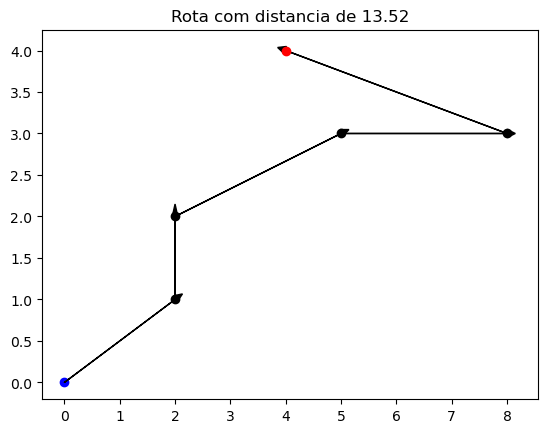

In [28]:
# Inicializa a variável menor_rota com o ponto de origem
menor_rota = [origem]

# Itera sobre os índices contidos no melhor indivíduo encontrado
# Cada índice em melhor_ind corresponde a um endereço na lista de endereços
for i in melhor_ind:
    # Adiciona o endereço correspondente ao índice i na lista menor_rota
    menor_rota.append(enderecos[i])

# Após iterar por todos os endereços, adiciona o ponto de destino à lista menor_rota
menor_rota.append(destino)

# Utiliza a função desenhar_rota para visualizar graficamente a rota encontrada
# Esta função deve estar definida previamente e ser capaz de receber uma lista de pontos (rota)
# e desenhar a rota correspondente
desenhar_rota(menor_rota)


***Diferença entre heurística e meta-heurística***

Heurísticas são técnicas projetadas para fornecer soluções rápidas e práticas para problemas específicos. Elas são como atalhos que nos dão respostas "boas o suficiente" em um tempo razoável. No contexto da roteirização de entregas, um exemplo clássico é a "heurística do vizinho mais próximo". A ideia é simples: a partir de um ponto de partida, o entregador sempre escolhe o endereço mais próximo ainda não visitado como seu próximo destino. Embora intuitiva e eficaz em muitos cenários, essa abordagem pode não ser a mais eficiente em termos de distância total percorrida.

Por outro lado, temos as meta-heurísticas. Estas são técnicas mais sofisticadas e abstratas que podem ser adaptadas para uma variedade de problemas. Ao contrário das heurísticas, que são geralmente específicas para um problema, as meta-heurísticas são abordagens mais gerais. Um exemplo popular de meta-heurística é o algoritmo genético. Ele simula o processo de evolução natural para encontrar soluções para problemas de otimização. No caso da roteirização, o algoritmo genético pode ser adaptado para encontrar a rota mais eficiente, ajustando seus operadores para esse contexto específico.

Ambas as abordagens, heurísticas e meta-heurísticas, têm suas vantagens. Enquanto as heurísticas oferecem soluções rápidas e diretas para problemas específicos, as meta-heurísticas oferecem uma flexibilidade que permite adaptá-las a diferentes problemas. No entanto, é crucial entender que nem heurísticas nem meta-heurísticas garantem a solução ótima, ou seja, a melhor solução possível. Elas buscam aproximações boas o suficiente em um tempo computacionalmente aceitável.

Em resumo, ao enfrentar o desafio da roteirização de entregas, é essencial ponderar entre a rapidez e simplicidade da heurística do vizinho mais próximo e a abordagem mais complexa, mas potencialmente mais eficaz, dos algoritmos genéticos. Compreender essas abordagens permite escolher a estratégia mais adequada para cada situação, equilibrando eficiência e recursos disponíveis.

## 2.3 - Comentários sobre algoritmos genéticos


Dessa forma, podemos criar uma função para chamar a execução de um algoritmo genético.

In [29]:
def algoritmo_genetico(origem, destino, enderecos, tam_populacao_inicial=100, prob_cruzamento=0.7, prob_mutacao=0.1, numero_geracoes=100):

    # Cria o tipo 'FitnessMin' que visa minimizar o valor da função objetivo (distância da rota)
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    # Cria o tipo 'Individuo', que é uma lista com um atributo de fitness do tipo 'FitnessMin'
    creator.create("Individuo", list, fitness=creator.FitnessMin)

    # Inicializa uma caixa de ferramentas para armazenar as configurações do algoritmo
    toolbox = base.Toolbox()
    # Registra a função 'Genes', que gera uma permutação aleatória de índices dos endereços
    toolbox.register("Genes", np.random.permutation, len(enderecos))
    # Registra a função 'Individuos', que inicializa um indivíduo (rota) usando 'Genes'
    toolbox.register("Individuos", tools.initIterate, creator.Individuo, toolbox.Genes)

    # Registra a função 'Populacao', que cria uma população de indivíduos
    toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)
    # Cria a população inicial com 'tam_populacao_inicial' indivíduos
    populacao = toolbox.Populacao(n=tam_populacao_inicial)

    # Registra o operador de cruzamento do tipo 'cxPartialyMatched'
    toolbox.register("mate", tools.cxPartialyMatched)
    # Registra o operador de mutação do tipo 'mutShuffleIndexes' com probabilidade de mutação por bit 'indpb'
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=prob_mutacao)
    # Registra o operador de seleção do tipo 'selTournament' com tamanho do torneio '3'
    toolbox.register("select", tools.selTournament, tournsize=3)
    # Registra a função de avaliação 'avaliar' com os argumentos de origem, endereços e destino
    toolbox.register("evaluate", avaliar, origem=origem, enderecos=enderecos, destino=destino)

    # Executa o algoritmo genético simples com os operadores e parâmetros definidos anteriormente
    algoritmo = algorithms.eaSimple(populacao,
                                    toolbox,
                                    cxpb=prob_cruzamento,  # Probabilidade de cruzamento
                                    mutpb=prob_cruzamento,  # Probabilidade de mutação
                                    ngen=numero_geracoes,  # Número de gerações
                                    verbose=False)  # Desativa a saída de log detalhada

    # Seleciona o melhor indivíduo da população final
    melhor_ind = tools.selBest(populacao, 1)[0]


    # Inicializa a variável menor_rota com o ponto de origem
    menor_rota = [origem]

    # Itera sobre os índices contidos no melhor indivíduo encontrado
    # Cada índice em melhor_ind corresponde a um endereço na lista de endereços
    for i in melhor_ind:
        # Adiciona o endereço correspondente ao índice i na lista menor_rota
        menor_rota.append(enderecos[i])

    # Após iterar por todos os endereços, adiciona o ponto de destino à lista menor_rota
    menor_rota.append(destino)

    # Calcula distancia percorrida
    distancia_percorrida = calcular_distancia_rota(menor_rota)

    return menor_rota, distancia_percorrida

In [30]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2, 1), (5, 3), (8, 3), (10, 5), (9, 4), (8, 7), (6, 3), (9, 6), (7, 5), (9, 1), (11, 10), (3, 6), (10, 10)]

In [31]:
menor_rota, distancia_percorrida = algoritmo_genetico(origem, destino, enderecos, numero_geracoes=100)

C:\Users\ze00346\AppData\Local\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\ze00346\AppData\Local\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


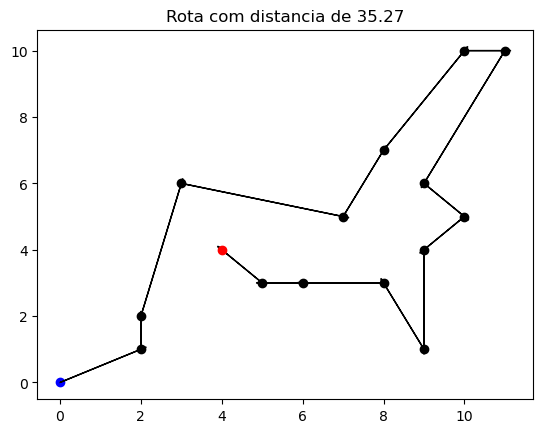

In [32]:
desenhar_rota(menor_rota)

# 3 - Algoritmos em grafos

## 3.1 - Representando o grafo

Para uma melhor visualização e compreensão do nosso problema de entregas, podemos representá-lo como um grafo direcionado. Em um grafo, temos nós (ou vértices) e arestas. Neste caso específico, cada nó representa um local (seja a origem, o destino ou um dos endereços de entrega), e as arestas representam o caminho entre dois locais, com um valor associado que indica a distância entre eles.

Vamos utilizar a biblioteca NetworkX, uma poderosa ferramenta Python para a criação, análise e visualização de grafos.

**Estrutura do Grafo**

Nós: Cada nó do grafo representa um local. A origem e o destino são adicionados como nós, assim como cada endereço de entrega. Associado a cada nó, temos as coordenadas do local que ele representa.

Arestas: As arestas conectam dois nós e representam o caminho entre dois locais. Associado a cada aresta, temos a distância entre os dois locais que ela conecta. Adicionamos arestas conectando a origem a cada endereço, cada endereço ao destino, e cada par de endereços distintos.

In [33]:
import networkx as nx

In [34]:
origem = (0,0)
destino = (4,4)

enderecos = [(2, 1), (2,2), (8, 3), (5, 3)]

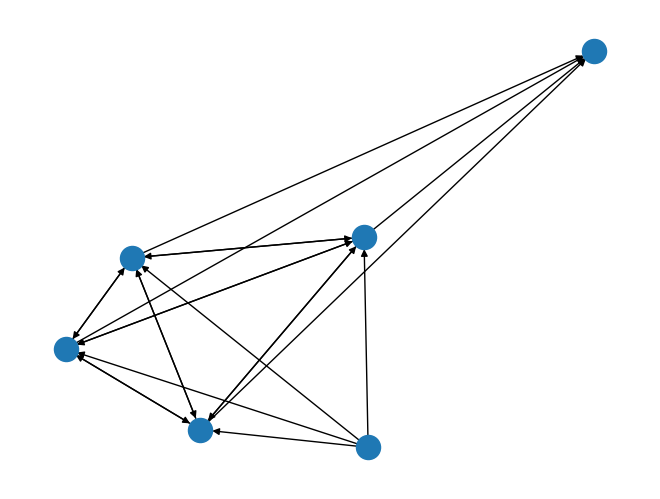

In [35]:
# Inicializando um Grafo Direcionado
G = nx.DiGraph()

# Adicionando o nó de origem com suas coordenadas
G.add_node('origem', local=origem)
# Adicionando o nó de destino com suas coordenadas
G.add_node('destino', local=destino)

# Iterando sobre a lista de endereços para adicionar cada endereço como um nó no grafo
for i, endereco in enumerate(enderecos):
    # O índice i identifica unicamente cada endereço
    # O parâmetro 'local' recebe as coordenadas do endereço
    G.add_node(i, local=endereco)

# Adicionando arestas ao grafo
for i, endereco in enumerate(enderecos):
    # Aresta da origem para cada endereço
    # A distância euclidiana entre a origem e o endereço é calculada e associada à aresta
    G.add_edge('origem', i, distancia=distancia_euclidiana(origem, endereco))

    # Aresta de cada endereço para o destino
    # A distância euclidiana entre o endereço e o destino é calculada e associada à aresta
    G.add_edge(i, 'destino', distancia=distancia_euclidiana(endereco, destino))

    # Loop aninhado para criar arestas entre cada par de endereços distintos
    for j, endereco2 in enumerate(enderecos):
        # Evitando criar aresta de um nó para ele mesmo
        if i != j:
            # A distância euclidiana entre os dois endereços é calculada e associada à aresta
            G.add_edge(i, j, distancia=distancia_euclidiana(endereco, endereco2))

# Desenhando o grafo criado
# Esta função irá criar uma visualização gráfica do grafo, onde cada nó é um ponto
# e cada aresta é uma linha conectando dois pontos
nx.draw(G)


## 3.2 - Caixeiro viajante

Imaginemos que somos parte de uma empresa de logística, e estamos diante de um desafio significativo. Nossa tarefa é otimizar as rotas de entrega, mas com uma nuance interessante: ao contrário das situações usuais, não precisamos começar a rota de um lugar fixo ou de origem. Temos a liberdade de escolher qualquer endereço como nosso ponto inicial. No entanto, é crucial que o último endereço que visitamos seja o mesmo onde começamos, formando assim um circuito completo.

**Entendendo o Problema**

Então, o que realmente estamos tentando resolver aqui? Visualize um entregador que tem um conjunto de pacotes, e cada pacote deve ser entregue em um endereço específico. Ele pode começar a entrega de qualquer um desses endereços, mas deve garantir que, no final do circuito, todos os pacotes sejam entregues, e ele retorne ao endereço inicial. A questão é: como podemos garantir que a rota escolhida seja a mais eficiente e minimize a distância total percorrida pelo entregador?

Isso é fundamentalmente o que chamamos de "Problema do Caixeiro Viajante" (TSP, Travelling Salesman Problem). Este problema é um clássico da otimização, onde o objetivo é encontrar o caminho mais curto que passa por todos os pontos (ou endereços, no nosso caso) exatamente uma vez, retornando ao ponto de partida.


**Aplicando ao Nosso Contexto de Entregas**

Para exemplificar e aplicar os conceitos do TSP na prática, vamos usar o problema de entrega que temos em mãos, que consiste em uma origem, um destino e uma lista de endereços a serem visitados.

Vamos assumir que a nossa lista de endereços é tudo o que precisamos considerar neste exemplo, ou seja, descartaremos momentaneamente a origem e destino do problema. Vamos criar um grafo usando esses endereços e aplicar o algoritmo do TSP para encontrar a rota mais eficiente.

Isso nos ajudará a entender melhor como os algoritmos do TSP funcionam e como podemos utilizá-los para melhorar e otimizar as operações de entrega da nossa empresa, garantindo que os pacotes cheguem aos destinos de maneira rápida e eficiente. Ao fazer isso, estaremos dando um passo valioso para melhorar nossos serviços e satisfazer nossos clientes.

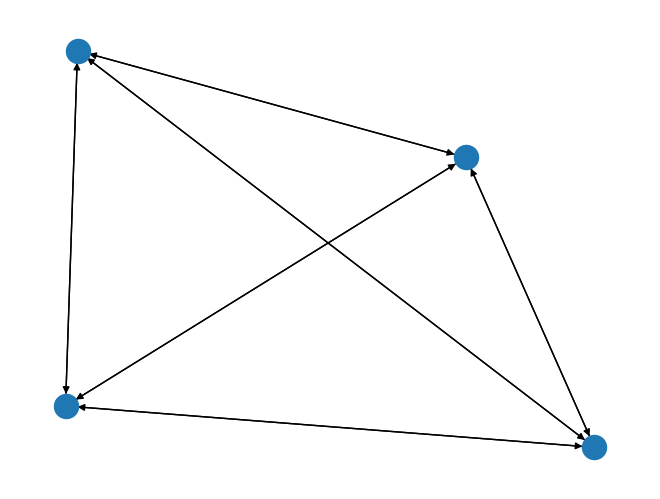

In [36]:
# Criamos um grafo direcionado. Cada nó (ou vértice) representa um endereço.
G_teste = nx.DiGraph()

# Adicionando cada endereço como um nó no grafo.
for i, endereco in enumerate(enderecos):
    # Adiciona um nó com uma etiqueta (i) e uma localização (endereço).
    G_teste.add_node(i, local=endereco)

# Agora, vamos conectar cada nó a todos os outros nós (criando um grafo completo).
for i, endereco in enumerate(enderecos):
    for j, endereco2 in enumerate(enderecos):
        if i!=j:  # Evitamos conectar um nó a ele mesmo.
            # Adicionamos uma aresta entre cada par de nós junto com o peso (distância entre os endereços).
            G_teste.add_edge(i, j, weight=distancia_euclidiana(endereco, endereco2))

# Finalmente, desenhamos o grafo para ter uma representação visual das conexões entre os endereços.
nx.draw(G_teste)


In [37]:
tsp = nx.approximation.traveling_salesman_problem(G_teste, weight="weight")
print(tsp)

[1, 3, 2, 0, 1]


## 3.3 - Caixeiro viajante para o problema das entregas

**Construindo o Grafo para o Nosso Problema de Logística**

Na nossa jornada para solucionar o problema das entregas, decidimos construir um grafo que irá representar de maneira clara e eficiente as rotas que podemos seguir. Este grafo nos permitirá visualizar e calcular as melhores rotas possíveis entre os pontos de origem, destino e todos os endereços que precisamos visitar.

Mas, o que estamos buscando não é um grafo qualquer. Queremos construir um **grafo fortemente conexo**. Isso significa que de cada nó (ou endereço) em nosso grafo, deve ser possível chegar a qualquer outro nó diretamente, o que reflete a realidade das opções de rota que nossa equipe de entregas pode enfrentar no campo. Mas como podemos fazer isso?

**Tornando o Grafo Fortemente Conexo**

Uma estratégia é adicionar uma aresta do nó de destino de volta ao nó de origem, efetivamente fechando o ciclo e garantindo que todos os nós estejam interconectados.

No nosso caso, vamos adicionar uma aresta com peso \(0\) (distância \(0\)) do nó de destino para o nó de origem. Isso simboliza que, após a última entrega ser feita, podemos retornar ao ponto de origem sem percorrer nenhuma distância adicional, completando assim o ciclo, tornando o grafo fortemente conexo e adequado para resolver o TSP.

Assim, podemos criar uma função ```criar_grafo``` que contém um parâmetro ```flag_fortemente_conexo```  que indica se queremos ou não adicionar uma aresta de retorno do destino para a origem com uma "distância" de zero, assegurando que nosso grafo seja agora fortemente conexo e esteja bem equipado para representar todas as possíveis rotas de entrega que precisamos considerar.

Com essa modificação, nosso grafo estará  totalmente preparado para ajudar-nos a explorar, avaliar e identificar a rota mais eficiente para nosso problema de logística.

In [38]:
def criar_grafo(origem, destino, enderecos, flag_fortemente_conexo=False):
    G = nx.DiGraph()
    # Adicionando o nó de origem ao grafo
    G.add_node('origem', local=origem)

    # Adicionando o nó de destino ao grafo
    G.add_node('destino', local=destino)

    for i, endereco in enumerate(enderecos):
        # Adicionando cada endereço como um nó no grafo
        G.add_node(i, local=endereco)

    for i, endereco in enumerate(enderecos):
        # Conectando cada endereço à origem e ao destino com o peso sendo a distância euclidiana
        G.add_edge('origem', i, weight=distancia_euclidiana(origem, endereco))
        G.add_edge(i, 'destino', weight=distancia_euclidiana(endereco, destino))
        for j, endereco2 in enumerate(enderecos):
            if i!=j:
                # Conectando cada endereço a todos os outros endereços
                G.add_edge(i, j, weight=distancia_euclidiana(endereco, endereco2))

    if flag_fortemente_conexo == True:
        # Conectando o destino de volta à origem para tornar o grafo fortemente conexo
        G.add_edge("destino", "origem", weight=0)

    return G  # Retornando o grafo criado

def algoritmo_em_grafo(origem, destino, enderecos):
    # Criando um grafo fortemente conexo
    G = criar_grafo(origem, destino, enderecos, flag_fortemente_conexo=True)

    # Resolvendo o problema do caixeiro viajante para encontrar o ciclo mais curto
    ciclo = nx.approximation.traveling_salesman_problem(G, weight="weight", cycle=False)

    indice_origem = ciclo.index("origem")  # Encontrando o índice da origem no ciclo
    ciclo_rotacionado = ciclo[indice_origem:] + ciclo[:indice_origem]  # Rotacionando o ciclo para começar pela origem

    ciclo_rotacionado.remove("origem")  # Removendo o nó de origem do ciclo
    ciclo_rotacionado.remove("destino")  # Removendo o nó de destino do ciclo

    melhor_rota = [origem]  # Inicializando a melhor rota com a origem

    for i in ciclo_rotacionado:
        # Adicionando cada endereço da melhor rota encontrada
        melhor_rota.append(enderecos[i])
    melhor_rota.append(destino)  # Adicionando o destino ao final da melhor rota

    # Calculando a distância total percorrida na melhor rota
    distancia_percorrida = calcular_distancia_rota(melhor_rota)

    return melhor_rota, distancia_percorrida  # Retornando a melhor rota e a distância total percorrida


In [39]:
origem = (0,0)
destino = (4,4)

enderecos = [(2, 1), (2,2), (8, 3), (5, 3)]
melhor_rota, distancia_percorrida = algoritmo_em_grafo(origem, destino, enderecos)
print(melhor_rota, distancia_percorrida)

[(0, 0), (2, 1), (2, 2), (5, 3), (8, 3), (4, 4)] 13.52145126328583


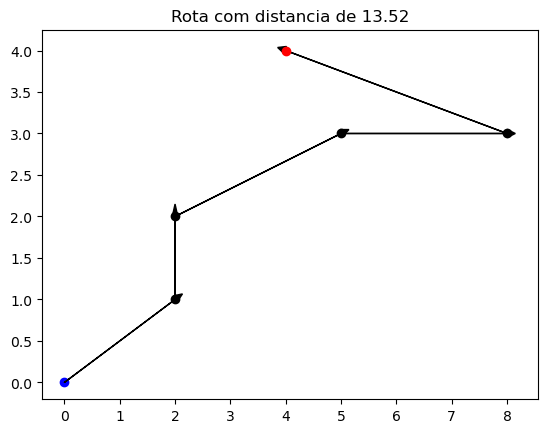

In [40]:
desenhar_rota(melhor_rota)

# 4 - Modelagem Matemática

**Modelagem Matemática**

Ao enfrentarmos desafios intrincados em diversas áreas, como ciência, engenharia ou logística, a modelagem matemática surge como uma ferramenta crucial. Ela nos permite encapsular a complexidade desses problemas em uma estrutura bem definida e analítica. O objetivo é simplificar o problema real, transformando-o em uma representação matemática concisa. Este processo envolve a identificação e integração de variáveis e parâmetros essenciais, bem como a definição clara das relações entre eles.

**Componentes Fundamentais da Modelagem Matemática:**

1. **Parâmetros:** Estes são os componentes fixos e conhecidos dentro do nosso modelo. Eles formam a base sobre a qual construímos nossa estrutura de modelagem, fornecendo as informações necessárias e essenciais que direcionam o processo de tomada de decisão.

2. **Variáveis de Decisão:** As variáveis de decisão são os elementos que determinam as soluções possíveis para o nosso problema. Elas são as incógnitas que queremos resolver. Além das principais variáveis de decisão, também podemos ter variáveis auxiliares que facilitam o processo de solução. Estas variáveis podem ser contínuas (números reais) ou discretas (inteiros, incluindo variáveis binárias que assumem valores de 0 ou 1).

3. **Função Objetivo:** A função objetivo é o coração do modelo, guiando a direção da otimização. Ela define o que queremos alcançar, maximizar ou minimizar, e é expressa em termos das variáveis de decisão. O objetivo pode ser o custo, lucro, eficiência ou qualquer outra métrica que seja crucial para o problema em questão.

4. **Restrições:** As restrições são as regras ou limitações impostas ao nosso problema. Elas formam os contornos dentro dos quais as soluções possíveis devem residir. As restrições podem refletir limites de recursos, regulamentos, políticas ou qualquer outra condição que deve ser satisfeita.

Ao orquestrar cuidadosamente esses componentes dentro de um modelo matemático, somos capazes de formular uma representação simbólica do problema real. Isso nos permite empregar técnicas analíticas e computacionais para explorar, analisar e, eventualmente, identificar soluções otimizadas para o problema em estudo.

Mas, após a formulação matemática do problema, enfrentamos o desafio de comunicar essa formulação ao computador de maneira que ele possa entender e processar. Aqui é onde entram em jogo a linguagem de modelagem e os solvers.

**Linguagem de Modelagem:**

A linguagem de modelagem atua como um tradutor, permitindo que comuniquemos o problema matemático ao computador. Utilizamos essa linguagem para definir as variáveis, restrições, parâmetros e a função objetivo de nosso modelo, organizando-os de maneira que o solver possa interpretar e processar. Vamos empregar o **OR-Tools**, especificamente o `pywraplp`, que é uma linguagem de modelagem poderosa. O `pywraplp` nos permite definir as variáveis, parâmetros, restrições e a função objetivo do nosso modelo de uma maneira que o computador possa interpretar e processar eficientemente.

**Solver:**

O solver é o mecanismo que pega o problema traduzido e busca uma solução. Ele aplica algoritmos e métodos numéricos para explorar o espaço de soluções possíveis, identificando a melhor solução de acordo com a função objetivo e as restrições definidas. Assim, escolhemos o **SCIP** como nosso solver. O SCIP é um solver avançado que tomará o modelo formulado e aplicará algoritmos sofisticados para encontrar a melhor solução possível, considerando as restrições e objetivos definidos no nosso modelo.

Ambos, linguagem de modelagem e solver, são vitais para traduzir e resolver um modelo matemático em um ambiente computacional, facilitando a análise e a tomada de decisões baseada em dados para problemas complexos.

## 4.1 - Parâmetros, variáveis de decisão e função objetivo


No contexto do nosso problema de entregas, estamos interessados em encontrar a rota mais eficiente para a realização de entregas em diferentes endereços, considerando uma origem e um destino final. Para isso, construímos um modelo matemático baseado em grafos.

1. **Grafo ($G$):** Nós definimos ($G$) como um grafo direcionado, composto por vértices ($V$) e arestas ($A$). Cada vértice no grafo representa um local que precisa ser visitado, e cada aresta representa o caminho entre dois locais. O grafo nos permite visualizar e calcular os caminhos possíveis que o entregador pode seguir para completar todas as entregas.

2. **Distância ($d_{ij}$):** Associamos um peso ($d_{ij}$) a cada aresta do grafo, que representa a distância entre o endereço $i$ e o endereço $j$ (ou seja, entre dois vértices consecutivos). Estes pesos são essenciais para calcular e comparar o comprimento de diferentes rotas, permitindo-nos encontrar a rota mais eficiente.

3. **Número de Vértices ($n$):** O parâmetro ($n$) denota o número total de vértices em nosso grafo, o que também representa o total de locais a serem visitados, incluindo a origem e o destino. Este parâmetro nos ajuda a entender a complexidade do problema, uma vez que mais vértices implicam em mais possíveis rotas a considerar.

Ao incorporar esses parâmetros em nosso modelo, podemos representar o problema de entregas de uma maneira matematicamente sólida, facilitando a utilização de algoritmos e técnicas de otimização para encontrar a solução mais eficiente. Isso nos permite manipular, analisar e resolver o problema utilizando ferramentas matemáticas e computacionais.

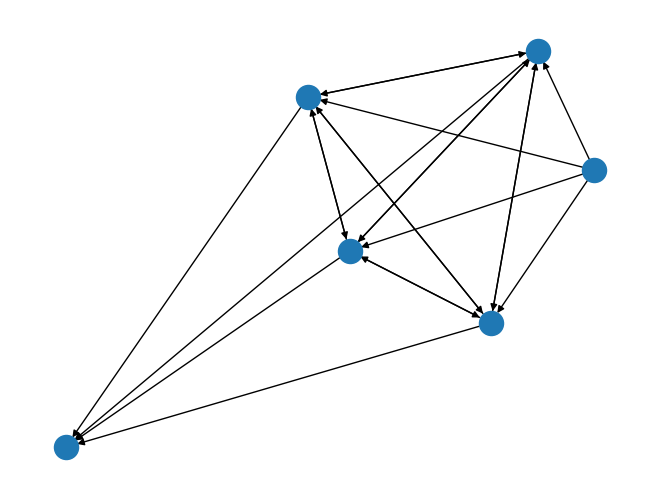

In [41]:
G = criar_grafo(origem, destino, enderecos)
nx.draw(G)

Para acessar uma distância para usar o método ```get_edge_data``` do grafo construído.

In [42]:
G.get_edge_data(0, 3)['weight']

3.605551275463989

Para acessar o número de nós podemos simplesmente usar o ```number_of_nodes``` do grafo construído.

In [43]:
n = G.number_of_nodes()
print(n)

6


In [44]:
!pip install ortools

In [45]:
from ortools.linear_solver import pywraplp

In [46]:
modelo = pywraplp.Solver.CreateSolver("SCIP")

**Variável $x_{ij}$**

A variável $x_{ij}$ é fundamental para determinar a presença ou ausência de uma aresta na solução final. Esta variável é binária, ou seja, assume o valor de 1 ou 0. Se $x_{ij} = 1$, isso indica que a aresta que conecta o vértice $i$ ao vértice $j$ está incluída na rota de entrega; se $x_{ij} = 0$, a aresta é excluída. Essa variável é essencial para estruturar a rota que será percorrida durante as entregas, facilitando o processo de otimização e tomada de decisão.

**Variável $u_i$**

A variável $u_i$ é uma variável contínua que nos ajuda a evitar subtours, estabelecendo uma ordem específica na qual os vértices (ou endereços de entrega) são visitados. Através da definição de $u_i$, nós conseguimos estabelecer uma sequência, garantindo que cada local seja visitado uma única vez, e assim, mantendo a solução viável e consistente com as necessidades do problema de entrega.

In [47]:
x = {}
for i,j in G.edges():
    x[(i,j)] = modelo.BoolVar(name=f"x[{i,j}]")

u = {}
for i in G.nodes():
    u[i] = modelo.NumVar(lb=1.0, ub=n, name=f"u[{i}]")

A função objetivo é um componente essencial em problemas de otimização, guiando a busca pela melhor solução. No contexto do problema de entregas, nossa função objetivo é minimizar o total da distância percorrida durante todas as entregas.

Representamos a função objetivo matematicamente como:

$$ \text{min} \sum_{i,j \in A} d_{ij} \cdot x_{ij} $$

Nesta expressão:

- $ \sum_{i,j \in A} $ é o somatório sobre todas as arestas $ (i, j) $ no conjunto de arestas $ A $.
- $ d_{ij} $ é a distância entre os pontos $ i $ e $ j $.
- $ x_{ij} $ é uma variável binária que é igual a 1 se a rota entre $ i $ e $ j $ está na solução, e 0 caso contrário.

A multiplicação $ d_{ij} \cdot x_{ij} $ calcula a contribuição total da aresta $ (i, j) $ para a distância total percorrida, considerando apenas as arestas que fazem parte da solução.

Finalmente, somamos as contribuições de todas as arestas para obter a distância total a ser minimizada. Ao minimizar essa expressão, buscamos a rota mais eficiente para realizar todas as entregas necessárias.

In [48]:
modelo.Minimize(sum(G.get_edge_data(i,j)['weight']*x[i,j] for i,j in G.edges()))

## 4.2 - Restrições

1. **Todo vértice tem uma aresta de saída marcada como 1:**
   $ \sum_{j \in \text{sucessor}_i} x_{ij} = 1, \forall i \in V \setminus \{\text{destino}\} $
   
   Esta restrição assegura que, para cada ponto de entrega (exceto o destino final), há exatamente uma aresta saindo dele que é incluída na solução. Ou seja, para cada local de entrega, haverá uma única transição para o próximo local na rota.

2. **Todo vértice tem uma aresta de entrada marcada como 1:**
   $ \sum_{j \in \text{predecessor}_i} x_{ij} = 1, \forall i \in V \setminus \{\text{origem}\} $
   
   Similar à primeira restrição, esta garante que cada ponto de entrega (exceto o ponto de origem) tenha exatamente uma aresta chegando até ele que faz parte da solução. Isso significa que cada local é acessado a partir de um único local anterior na rota.

3. **Evitar sub-rotas:**
   $ u_i - u_j + n \cdot x_{ij} \leq n-1 \forall i,j \in E $
   
   Esta é uma restrição crucial que ajuda a evitar soluções em que são formados ciclos separados ou sub-rotas que não estão conectados ao restante da rota. Aqui:
   - $ u_i $ representa a ordem em que o vértice $i$ é visitado.
   - A restrição garante que a ordem de visita $ u_i $ e $ u_j $ entre dois vértices $i$ e $j$ seja consistente com a decisão $ x_{ij} $, evitando assim a formação de sub-rotas que não estão conectadas à rota principal.
   - O valor de $n$ é o número total de vértices.

Essas restrições, em conjunto, ajudam a garantir que a solução seja uma rota única, conectada e coerente, que passe por todos os pontos de entrega uma única vez.

In [49]:
for i in G.nodes():
    if i!='destino':
        modelo.Add(sum(x[i,j] for j in G.successors(i)) == 1)

    if i!='origem':
        modelo.Add(sum(x[j,i] for j in G.predecessors(i)) == 1)

for i,j in G.edges():
    modelo.Add(u[i] - u[j] + n*x[i,j] <= n -1)

In [50]:
status = modelo.Solve()

In [51]:
if status == pywraplp.Solver.OPTIMAL :
    print("Solução ótima! ")
    print(modelo.Objective().Value())


    for i,j in G.edges():
        if x[i,j].solution_value() > 0:
            print(f"{i} para {j} com valor: {x[i,j].solution_value()}")

    for i in G.nodes():
        print(i, u[i].solution_value())

Solução ótima! 
13.52145126328583
origem para 0 com valor: 1.0
0 para 1 com valor: 1.0
1 para 3 com valor: 1.0
2 para destino com valor: 1.0
3 para 2 com valor: 1.0
origem 1.0
destino 6.0
0 2.0
1 3.0
2 5.0
3 4.0


## 4.3 - Resolução do modelo

**Execução do Modelo Matemático com o Solver SCIP**

Depois de cuidadosamente construir e definir nosso modelo matemático, o próximo passo é encontrar a solução que melhor atenda aos nossos objetivos e restrições. Para fazer isso, empregamos o uso de um solver, e, neste caso, escolhemos o SCIP (Solving Constraint Integer Programs) como nosso executor confiável.

O SCIP é uma ferramenta tem algoritmos implementados que buscam as variáveis de decisão que minimizam ou maximizam nossa função objetivo, respeitando as limitações e restrições previamente definidas no modelo. Com o SCIP, não estamos apenas “chutando” soluções; estamos conduzindo uma busca sistemática e robusta através de um universo de soluções possíveis para encontrar aquela que atenda da melhor forma possível às nossas necessidades.

In [52]:
# Resolvendo o modelo
status = modelo.Solve()

In [53]:
# Inicializando a lista que vai guardar a melhor rota encontrada
melhor_rota = []

# Inicializando a distância percorrida com infinito, para que qualquer rota encontrada seja melhor
distancia_percorrida = float('inf')

# Um dicionário para traduzir o status da solução
status_descricao = {pywraplp.Solver.OPTIMAL: 'Ótimo', pywraplp.Solver.FEASIBLE: 'Viável'}

# Verifica se o status da solução é ótimo ou viável
if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:

    # Imprime o status da solução
    print("Solução ", status_descricao[status])

    # Obtém o valor da função objetivo da solução encontrada, que é a distância total percorrida
    distancia_percorrida = modelo.Objective().Value()

    # Cria uma lista para armazenar a ordem dos locais na melhor rota
    melhor_rota = [0]*n

    # Para cada nó no grafo
    for i in G.nodes():

        # Obtém o valor da variável de decisão correspondente à ordem de visita
        indice = round(u[i].solution_value())-1

        # Atribui o local à posição correspondente na lista da melhor rota
        melhor_rota[indice] = G.nodes[i]["local"]

# Imprime a melhor rota encontrada
print(melhor_rota)


Solução  Ótimo
[(0, 0), (2, 1), (2, 2), (5, 3), (8, 3), (4, 4)]


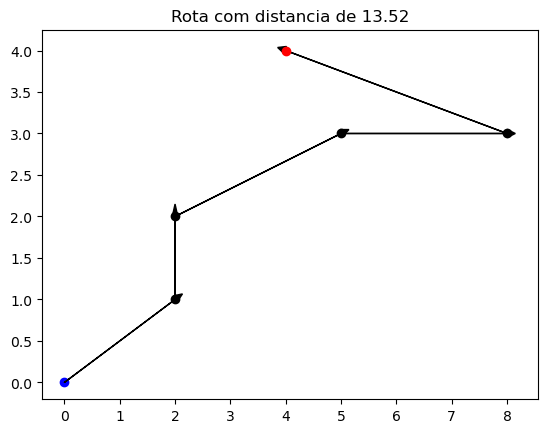

In [54]:
desenhar_rota(melhor_rota)

# 5 - Combinação de métodos e detalhes solução

## 5.1 Avaliando o modelo matemático

In [55]:
def modelo_matematico(origem, destino, enderecos):

    # Criação do grafo com nós e arestas representando os endereços e as rotas possíveis
    G = criar_grafo(origem, destino, enderecos)

    # Determinando o número de nós no grafo
    n = G.number_of_nodes()

    # Inicializando o solver SCIP
    modelo = pywraplp.Solver.CreateSolver("SCIP")

    # Definindo o limite de tempo para a execução do solver
    modelo.SetTimeLimit(60*1000)

    # Inicialização das variáveis de decisão
    x = {}
    for i,j in G.edges():
        x[(i,j)] = modelo.BoolVar(name=f"x[{i,j}]")

    u = {}
    for i in G.nodes():
        u[i] = modelo.NumVar(lb=1.0, ub=n, name=f"u[{i}]")

    # Definição da função objetivo
    modelo.Minimize(sum(G.get_edge_data(i,j)['weight']*x[i,j] for i,j in G.edges()))

    # Adicionando as restrições ao modelo
    for i in G.nodes():
        if i!='destino':
            modelo.Add(sum(x[i,j] for j in G.successors(i)) == 1)

        if i!='origem':
            modelo.Add(sum(x[j,i] for j in G.predecessors(i)) == 1)

    # Restrição para evitar sub-rotas
    for i,j in G.edges():
        modelo.Add(u[i] - u[j] + n*x[i,j] <= n -1)

    # Resolvendo o modelo
    status = modelo.Solve()

    # Inicializando variáveis para armazenar os resultados
    melhor_rota = []
    distancia_percorrida = float('inf')

    # Mapeamento de status de solução
    status_descricao = {pywraplp.Solver.OPTIMAL: 'Ótima',
                        pywraplp.Solver.FEASIBLE: 'Viável',
                        pywraplp.Solver.INFEASIBLE: 'Inviável',
                        pywraplp.Solver.UNBOUNDED: 'Ilimitada',
                        pywraplp.Solver.ABNORMAL: 'Anormal',
                        pywraplp.Solver.NOT_SOLVED: 'Não Resolvida'}

    # Extraindo e formatando os resultados após a solução do modelo
    if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
        print("Solução ", status_descricao[status])
        distancia_percorrida = modelo.Objective().Value()

        # Determinando a melhor rota baseada nas variáveis de decisão solucionadas
        melhor_rota = [0]*n
        for i in G.nodes():
            indice = round(u[i].solution_value())-1
            melhor_rota[indice] = G.nodes[i]["local"]

    # Retornando a melhor rota e a distância percorrida
    return melhor_rota, distancia_percorrida


In [56]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2, 1), (5, 3), (8, 3), (10, 5), (9, 4), (8, 7), (6, 3), (9, 6), (7, 5), (9, 1), (11, 10), (3, 6), (10, 10)]

Solução  Ótima


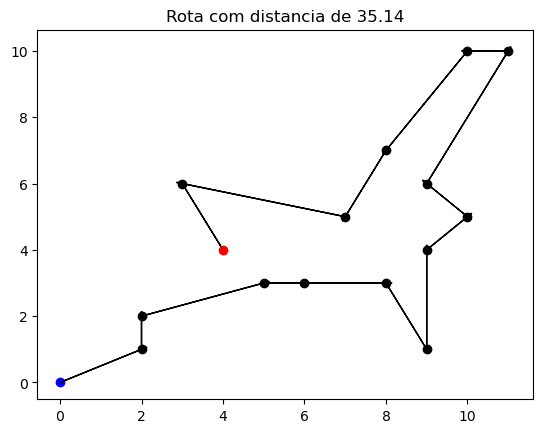

In [57]:
melhor_rota, distancia_percorrida = modelo_matematico(origem, destino, enderecos)

desenhar_rota(melhor_rota)

## 5.2 - Combinando heurística e o modelo matemático

In [71]:
def modelo_matematico_com_heuristica(origem, destino, enderecos):

    # Criando um grafo baseado nos endereços fornecidos
    G = criar_grafo(origem, destino, enderecos)
    n = G.number_of_nodes()

    # Obtendo uma rota inicial e sua distância usando uma heurística do vizinho mais próximo
    rota_heuristica, distancia_heuristica = vizinho_mais_proximo(origem, destino, enderecos)

    # Inicializando o solver SCIP com um limite de tempo
    modelo = pywraplp.Solver.CreateSolver("SCIP")
    modelo.SetTimeLimit(3*60*1000)

    # Variáveis de decisão
    x = {}
    for i,j in G.edges():
        x[(i,j)] = modelo.BoolVar(name=f"x[{i,j}]")

    u = {}
    for i in G.nodes():
        u[i] = modelo.NumVar(lb=1.0, ub=n, name=f"u[{i}]")

    # Função objetivo
    expr_distancia = sum(G.get_edge_data(i,j)['weight']*x[i,j] for i,j in G.edges())
    modelo.Minimize(expr_distancia)

    # Restrições
    # A restrição garante que a solução do modelo não seja pior que a solução heurística inicial
    modelo.Add(expr_distancia <= distancia_heuristica)

    # Adicionando restrições que garantem que cada nó seja visitado uma vez
    for i in G.nodes():
        if i!='destino':
            modelo.Add(sum(x[i,j] for j in G.successors(i)) == 1)

        if i!='origem':
            modelo.Add(sum(x[j,i] for j in G.predecessors(i)) == 1)

    # Adicionando restrições para evitar sub-rotas
    for i,j in G.edges():
        modelo.Add(u[i] - u[j] + n*x[i,j] <= n -1)

    # Resolvendo o modelo
    status = modelo.Solve()

    # Formatação dos resultados
    # Inicializando com a rota e distância da heurística
    melhor_rota = rota_heuristica
    distancia_percorrida = distancia_heuristica

    # Mapeamento do status da solução
    status_descricao = {pywraplp.Solver.OPTIMAL: 'Ótima',
                        pywraplp.Solver.FEASIBLE: 'Viável',
                        pywraplp.Solver.INFEASIBLE: 'Inviável',
                        pywraplp.Solver.UNBOUNDED: 'Ilimitada',
                        pywraplp.Solver.ABNORMAL: 'Anormal',
                        pywraplp.Solver.NOT_SOLVED: 'Não Resolvida'}

    # Atualizando a rota e a distância se uma solução ótima ou viável for encontrada
    if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
        print("Solução ", status_descricao[status])
        distancia_percorrida = modelo.Objective().Value()

        # Construindo a melhor rota com base nas variáveis de decisão
        melhor_rota = [0]*n
        for i in G.nodes():
            indice = round(u[i].solution_value())-1
            melhor_rota[indice] = G.nodes[i]["local"]

    # Retornando a melhor rota encontrada e a distância correspondente
    return melhor_rota, distancia_percorrida

In [72]:
origem = (0,0)
destino = (4,4)

import random

enderecos = [(random.randint(0,100), random.randint(0,100)) for i in range(50)]
print(enderecos)

[(76, 68), (36, 27), (48, 51), (3, 23), (11, 17), (92, 88), (20, 20), (83, 83), (71, 23), (38, 86), (0, 50), (58, 45), (66, 25), (62, 66), (27, 21), (69, 91), (15, 9), (59, 78), (35, 82), (24, 20), (76, 13), (30, 66), (19, 90), (85, 28), (57, 90), (52, 20), (27, 59), (93, 88), (0, 57), (7, 77), (20, 25), (29, 10), (77, 8), (67, 82), (12, 85), (64, 56), (81, 4), (14, 34), (87, 92), (49, 88), (5, 100), (32, 41), (30, 17), (49, 2), (29, 4), (20, 52), (86, 40), (84, 19), (86, 68), (80, 2)]


In [73]:
menor_rota, distancia_percorrida = modelo_matematico_com_heuristica(origem, destino, enderecos)
print(distancia_percorrida)

Solução  Viável
609.7580457049305


In [74]:
print(menor_rota)

[(0, 0), (15, 9), (11, 17), (20, 25), (20, 20), (24, 20), (27, 21), (30, 17), (29, 10), (29, 4), (49, 2), (52, 20), (36, 27), (32, 41), (20, 52), (27, 59), (30, 66), (48, 51), (58, 45), (66, 25), (71, 23), (76, 13), (77, 8), (80, 2), (81, 4), (84, 19), (85, 28), (86, 40), (64, 56), (62, 66), (76, 68), (86, 68), (83, 83), (92, 88), (93, 88), (87, 92), (69, 91), (67, 82), (59, 78), (57, 90), (49, 88), (38, 86), (35, 82), (19, 90), (5, 100), (12, 85), (7, 77), (0, 57), (0, 50), (14, 34), (3, 23), (4, 4)]


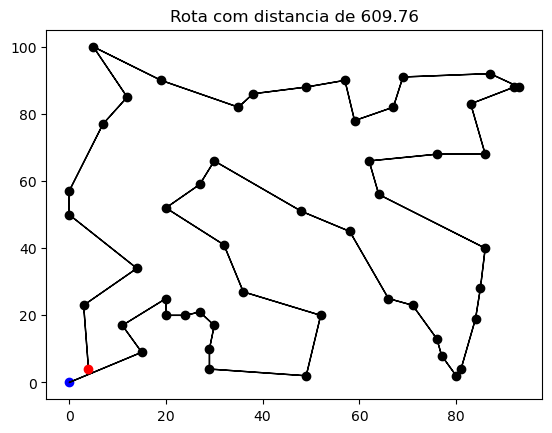

In [75]:
desenhar_rota(menor_rota)

## 5.3 - Avaliando soluções viáveis

Nós frequentemente utilizamos várias métricas para avaliar a performance e a qualidade das soluções geradas por algoritmos de otimização, e uma dessas métricas essenciais é o **gap de otimização MILP (Mixed Integer Linear Programming)**. Essa métrica nos ajuda a entender o quão próxima está a solução encontrada do valor ótimo real ou do melhor valor conhecido.

**Calculando o Gap MILP**

A fórmula para calcular o gap MILP é a seguinte:

$$ \text{gap} = \frac{|resultado - melhor\_bound|}{|resultado|} $$

- **resultado**: Refere-se ao valor da função objetivo da melhor solução inteira encontrada até o momento.
- **melhor_bound**: É o melhor valor estimado da função objetivo, que pode ser obtido relaxando as restrições de integralidade do problema.

**Entendendo o Conceito**

O gap MILP essencialmente mede a diferença entre o melhor valor encontrado e uma estimativa do valor ótimo, normalizada pelo valor encontrado. A ideia por trás do cálculo é ter uma medida relativa da qualidade da solução, em vez de uma diferença absoluta. Isso torna o gap MILP uma métrica valiosa, permitindo-nos comparar a qualidade das soluções entre diferentes instâncias de problemas e diferentes métodos de solução.

Um gap MILP menor indica que a solução encontrada está mais próxima do valor ótimo, enquanto um gap maior sugere que pode haver espaço significativo para melhorar a solução atual. Quando o gap MILP é zero, isso significa que encontramos uma solução que é provavelmente ótima (dentro de uma tolerância específica).

Ao utilizar essa métrica, podemos ter uma visão mais clara do desempenho do nosso modelo ou algoritmo em termos de sua precisão e eficácia na resolução de problemas MILP, ajudando-nos a fazer ajustes e melhorias conforme necessário.

In [76]:
def modelo_matematico_com_heuristica(origem, destino, enderecos):
    # Criando o grafo com base nos endereços fornecidos
    G = criar_grafo(origem, destino, enderecos)
    n = G.number_of_nodes()

    # Obtendo uma rota heurística inicial e sua distância
    rota_heuristica, distancia_heuristica = vizinho_mais_proximo(origem, destino, enderecos)

    # Inicializando o solver SCIP
    modelo = pywraplp.Solver.CreateSolver("SCIP")
    modelo.SetTimeLimit(3*60*1000)  # Limitando o tempo de solução para 2 minutos

    # Definindo as variáveis de decisão
    x = {}
    for i,j in G.edges():
        x[(i,j)] = modelo.BoolVar(name=f"x[{i,j}]")

    u = {}
    for i in G.nodes():
        u[i] = modelo.NumVar(lb=1.0, ub=n, name=f"u[{i}]")

    # Definindo a função objetivo
    expr_distancia = sum(G.get_edge_data(i,j)['weight']*x[i,j] for i,j in G.edges())
    modelo.Minimize(expr_distancia)

    # Adicionando restrições ao modelo
    modelo.Add(expr_distancia <= distancia_heuristica)  # Restrição da distância baseada na heurística

    # Garantindo que cada vértice seja visitado uma vez
    for i in G.nodes():
        if i!='destino':
            modelo.Add(sum(x[i,j] for j in G.successors(i)) == 1)

        if i!='origem':
            modelo.Add(sum(x[j,i] for j in G.predecessors(i)) == 1)

    # Restrições para eliminar sub-rotas
    for i,j in G.edges():
        modelo.Add(u[i] - u[j] + n*x[i,j] <= n -1)

    # Resolvendo o modelo
    status = modelo.Solve()

    # Processando e apresentando os resultados
    melhor_rota = rota_heuristica
    distancia_percorrida = distancia_heuristica

    status_descricao = {pywraplp.Solver.OPTIMAL: 'Ótima',
                        pywraplp.Solver.FEASIBLE: 'Viável',
                        pywraplp.Solver.INFEASIBLE: 'Inviável',
                        pywraplp.Solver.UNBOUNDED: 'Ilimitada',
                        pywraplp.Solver.ABNORMAL: 'Anormal',
                        pywraplp.Solver.NOT_SOLVED: 'Não Resolvida'}

    if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
        print("Solução ", status_descricao[status])
        distancia_percorrida = modelo.Objective().Value()  # Obtendo o valor da função objetivo
        melhor_bound = modelo.Objective().BestBound()  # Obtendo o melhor bound

        # Calculando o gap
        gap = 100*abs(distancia_percorrida - melhor_bound)/distancia_percorrida
        print("gap=", gap)

        # Construindo a melhor rota baseada nas variáveis de decisão
        melhor_rota = [0]*n
        for i in G.nodes():
            indice = round(u[i].solution_value())-1
            melhor_rota[indice] = G.nodes[i]["local"]

    return melhor_rota, distancia_percorrida  # Retornando a melhor rota e a distância percorrida


In [77]:
menor_rota, distancia_percorrida = modelo_matematico_com_heuristica(origem, destino, enderecos)
print(distancia_percorrida)

Solução  Viável
gap= 3.6533002527609995
609.7580457049305


# Extra

Passar uma solução inicial para um modelo de otimização, como os utilizados pelo Google OR-Tools, pode ser uma maneira eficaz de acelerar o processo de solução e, muitas vezes, pode levar a soluções de melhor qualidade. A solução inicial funciona como ponto de partida para o solver, e pode ser particularmente útil quando se tem uma boa estimativa da solução ótima, que pode ser obtida por heurísticas ou outros métodos.

O método `SetHint` do Google OR-Tools é usado para esse propósito. Ele permite que você passe valores específicos para as variáveis de decisão, dando ao solver um ponto de partida. Aqui está uma descrição passo a passo de como você pode fazer isso:

### 1. **Obtendo uma Solução Heurística:**
   - Primeiro, você precisa de uma solução heurística para o seu problema. Esta solução não precisa ser ótima, mas deve ser uma solução viável.
   - Existem diferentes heurísticas que você pode usar, dependendo do seu problema específico. Uma heurística comum é a do "vizinho mais próximo", mas muitas outras também podem ser aplicadas.

### 2. **Preparando a Solução Heurística:**
   - Você deve formatar a solução heurística para que ela possa ser passada para o modelo. Isso geralmente envolve a criação de uma lista de variáveis e uma lista de valores correspondentes.
   - Esses valores representam uma solução completa e viável para o problema.

### 3. **Usando o Método `SetHint`:**
   - O método `SetHint` é chamado no modelo de otimização, e as listas de variáveis e valores são passadas como argumentos.
   - `modelo.SetHint(variaveis, valores)`, onde `variaveis` é uma lista de variáveis de decisão e `valores` é uma lista dos valores correspondentes que você quer definir para essas variáveis.

### 4. **Resolvendo o Modelo:**
   - Depois de passar a solução inicial, você pode resolver o modelo como faria normalmente.
   - O solver usará a solução inicial fornecida como um ponto de partida, o que pode melhorar o tempo de solução e a qualidade da solução.

Este método pode ser especialmente poderoso quando você tem uma heurística forte, e pode significativamente acelerar o processo de solução, melhorando a eficiência do solver e, muitas vezes, a qualidade da solução final.

In [78]:
def modelo_matematico_com_heuristica(origem, destino, enderecos):
    G = criar_grafo(origem, destino, enderecos)  # Criando o grafo
    n = G.number_of_nodes()  # Obtendo o número de nós

    # Obtendo uma rota inicial baseada na heurística do vizinho mais próximo
    rota_heuristica, distancia_heuristica = vizinho_mais_proximo(origem, destino, enderecos)

    # Criando o solver
    modelo = pywraplp.Solver.CreateSolver("SCIP")
    modelo.SetTimeLimit(3*60*1000)  # Definindo o limite de tempo para resolver o problema

    # Definindo as variáveis de decisão
    x = {}
    for i, j in G.edges():
        x[(i, j)] = modelo.BoolVar(name=f"x[{i},{j}]")  # Variáveis binárias representando as arestas

    u = {}
    for i in G.nodes():
        u[i] = modelo.NumVar(lb=1.0, ub=n, name=f"u[{i}]")  # Variáveis auxiliares para evitar subciclos

    # Definindo a função objetivo: minimizar a distância total percorrida
    expr_distancia = sum(G.get_edge_data(i, j)['weight'] * x[i, j] for i, j in G.edges())
    modelo.Minimize(expr_distancia)

    # Adicionando restrições de fluxo
    for i in G.nodes():
        if i != 'destino':
            modelo.Add(sum(x[i, j] for j in G.successors(i)) == 1)  # Cada nó deve ser saído uma vez

        if i != 'origem':
            modelo.Add(sum(x[j, i] for j in G.predecessors(i)) == 1)  # Cada nó deve ser entrado uma vez

    # Adicionando restrições para eliminar subciclos
    for i, j in G.edges():
        modelo.Add(u[i] - u[j] + n * x[i, j] <= n - 1)

    # Inicializando as variáveis de decisão com a solução heurística
    variaveis = []
    valores = []
    for i, j in G.edges():
        indice_i = rota_heuristica.index(G.nodes[i]["local"])
        indice_j = rota_heuristica.index(G.nodes[j]["local"])
        valor = 0
        if indice_i - indice_j == -1:  # Se os nós são consecutivos na rota heurística
            valor = 1  # A variável correspondente é inicializada com 1

        variaveis.append(x[i, j])
        valores.append(valor)
        modelo.SetHint(variaveis, valores)  # Definindo a solução inicial com a heurística

    # Resolvendo o modelo
    status = modelo.Solve()

    # Processando e exibindo os resultados
    melhor_rota = rota_heuristica
    distancia_percorrida = distancia_heuristica

    status_descricao = {pywraplp.Solver.OPTIMAL: 'Ótima',
                        pywraplp.Solver.FEASIBLE: 'Viável',
                        pywraplp.Solver.INFEASIBLE: 'Inviável',
                        pywraplp.Solver.UNBOUNDED: 'Ilimitada',
                        pywraplp.Solver.ABNORMAL: 'Anormal',
                        pywraplp.Solver.NOT_SOLVED: 'Não Resolvida'}

    if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
        print("Solução ", status_descricao[status])
        distancia_percorrida = modelo.Objective().Value()  # Obtendo o valor da solução ótima
        melhor_bound = modelo.Objective().BestBound()  # Obtendo o melhor limitante inferior

        # Calculando e exibindo o gap
        gap = 100 * abs(distancia_percorrida - melhor_bound) / distancia_percorrida
        print("gap=", gap)

        # Construindo a melhor rota com base na solução
        melhor_rota = [0] * n
        for i in G.nodes():
            indice = round(u[i].solution_value()) - 1
            melhor_rota[indice] = G.nodes[i]["local"]

    return melhor_rota, distancia_percorrida  # Retornando a melhor rota e sua distância

In [79]:
menor_rota, distancia_percorrida = modelo_matematico_com_heuristica(origem, destino, enderecos)
print(distancia_percorrida)

Solução  Viável
gap= 1.7756411949760562
602.1016489244633


# Desafio

In [80]:
# Aeroporto
origem = (-3.778209341420737, -38.54067345827758)

# Rodoviária para viajar para outra cidade
destino = (-3.7562689807652148, -38.53069905284466)

endereços = [
    (-3.8070157671711327, -38.522390190229515), # Arena Castelão
    (-3.8113368327863695, -38.47842114975064), # Casa José de Alencar
    (-3.7228590971235214, -38.48725123255914), # Beira Mar
    (-3.7449881733005617, -38.48548492241305), # Parque do Cocó
    (-3.8060995079703828, -38.41032316574923), # Praia da Sabiaguaba
    (-3.7201132634671494, -38.52451664298032), # Mercado Central
    (-3.7171479354666146, -38.51025303928503), # Praia de Iracema
    (-3.7204016008787417, -38.5072937087797), # Aterro da Praia de Iracema
    (-3.7186886031095905, -38.50986862934191), # Estátua de Iracema Guardiã
    (-3.7333186993953613, -38.489534749043244), # Museu da fotografia
]

In [82]:
!pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/03/12/45a714482b9aa23cf708c5d07810d8133c4277b9d28db55e51352a0cb2da/folium-0.18.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/fc/be/720f85abacd654ec86f1431bc7c004eae74417bd9d0e7a2bc43601062627/branca-0.8.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/108.9 kB ? eta -:--:--
   ------- ------------------------------- 20.5/108.9 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 108.9/108.9 kB 1.6 MB/s eta 0:00:00


In [83]:
import folium

# Aeroporto
origem = (-3.778209341420737, -38.54067345827758)

# Rodoviária para viajar para outra cidade
destino = (-3.7562689807652148, -38.53069905284466)

enderecos = [
    (-3.8070157671711327, -38.522390190229515), # Arena Castelão
    (-3.8113368327863695, -38.47842114975064), # Casa José de Alencar
    (-3.7228590971235214, -38.48725123255914), # Beira Mar
    (-3.7449881733005617, -38.48548492241305), # Parque do Cocó
    (-3.8060995079703828, -38.41032316574923), # Praia da Sabiaguaba
    (-3.7201132634671494, -38.52451664298032), # Mercado Central
    (-3.7171479354666146, -38.51025303928503), # Praia de Iracema
    (-3.7204016008787417, -38.5072937087797), # Aterro da Praia de Iracema
    (-3.7186886031095905, -38.50986862934191), # Estátua de Iracema Guardiã
    (-3.7333186993953613, -38.489534749043244), # Museu da fotografia
]

In [84]:
# Criando um mapa centrado na média das coordenadas
mapa = folium.Map(location=[sum([x[0] for x in [origem, destino] + enderecos]) / (2 + len(enderecos)),
                           sum([x[1] for x in [origem, destino] + enderecos]) / (2 + len(enderecos))],
                  zoom_start=13)

# Adicionando pontos ao mapa
folium.Marker(location=origem, popup='Aeroporto', icon=folium.Icon(color='blue')).add_to(mapa)
folium.Marker(location=destino, popup='Rodoviária', icon=folium.Icon(color='green')).add_to(mapa)

for i, endereco in enumerate(enderecos, start=1):
    folium.Marker(location=endereco, popup=f'Ponto {i}', icon=folium.Icon(color='red')).add_to(mapa)

# Salvando o mapa em um arquivo HTML
# mapa.save('mapa.html')

# mapa

In [85]:
menor_rota, distancia_percorrida = modelo_matematico_com_heuristica(origem, destino, enderecos)
print(distancia_percorrida)

Solução  Ótima
gap= 0.0
0.34264954255525987


In [86]:
def desenhar_caminho(mapa, rota, cores=['blue', 'green', 'red']):
    """
    Desenha um caminho no mapa baseado na rota fornecida.

    :param mapa: Objeto mapa onde o caminho será desenhado.
    :param rota: Lista de coordenadas (latitude, longitude) representando a rota.
    :param cores: Lista de cores para os marcadores; o default inclui azul, verde e vermelho.
    """
    # Adicionando pontos ao mapa
    for i, coord in enumerate(rota):
        cor = cores[i % len(cores)]  # Escolhe uma cor da lista, repetindo se necessário
        folium.Marker(location=coord, icon=folium.Icon(color=cor)).add_to(mapa)

    # Adicionando linhas entre os pontos
    folium.PolyLine(rota, color="blue", weight=2.5, opacity=1).add_to(mapa)

In [87]:
# Exemplo de uso
mapa = folium.Map(location=list(origem), zoom_start=13)

desenhar_caminho(mapa, menor_rota)

In [88]:
mapa